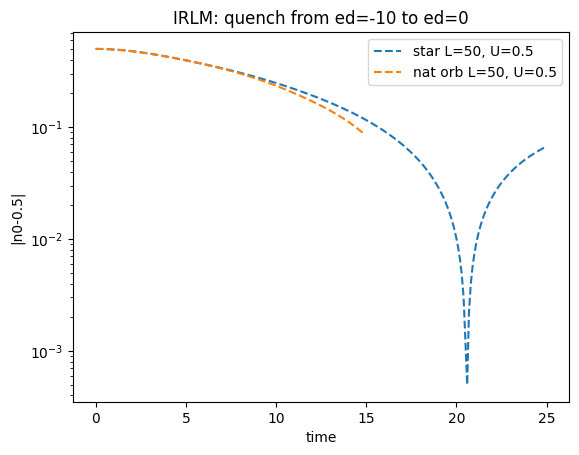

In [84]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("IRLM: quench from ed=-10 to ed=0")
plt.xlabel("time")
plt.ylabel("|n0-0.5|")
plt.yscale("log")

for L in [50]:#[100,200,300,400]:   #100,101,200,202,300,203]:
    n01=np.loadtxt(f"tdvp_chain/L{L}/irlm_star_L{L}.txt", skiprows=1)
    n02=np.loadtxt(f"tdvp_star/L{L}/irlm_star_L{L}.txt", skiprows=1)
    n03=np.loadtxt(f"tdvp_no2/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #n03_1=np.loadtxt(f"tdvp_no/L{L}/irlm_no_L{L}_1.txt", skiprows=1)
    #plt.plot(n01[:,0],[abs(x-0.5) for x in n01[:,3]], '-', label=f"chain L={L}, U=0.5")
    plt.plot(n02[:,0],[abs(x-0.5) for x in n02[:,3]], '--', label=f"star L={L}, U=0.5")
    plt.plot(n03[:,0],[abs(x-0.5) for x in n03[:,4]], '--', label=f"nat orb L={L}, U=0.5")
    #plt.plot(n03_1[:,0],[abs(x-0.5) for x in n03_1[:,4]], '--', label=f"nat orb L={L}, U=0.5 with cutoff")
    
plt.legend()

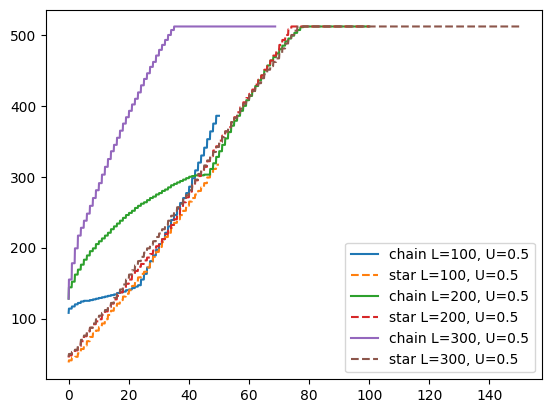

In [4]:
c=0
for L in [100,200,300]:#[100,200,300,400,500,600]:   #100,101,200,202,300,203]:
    c=c+1
    n01=np.loadtxt(f"tdvp_chain/L{L}/irlm_star_L{L}.txt", skiprows=1)
    n02=np.loadtxt(f"tdvp_star/L{L}/irlm_star_L{L}.txt", skiprows=1)
    plt.plot(n01[:,0],n01[:,1], '-', label=f"chain L={L}, U=0.5")
    plt.plot(n02[:,0],n02[:,1], '--', label=f"star L={L}, U=0.5")
plt.legend()